## import modules

In [2]:
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt
%matplotlib inline 
#new stuff 7/9 for automating process
import os
import os.path
from pathlib2 import Path

## import data

In [3]:
surface_areas = ['SA19-1_20ns', 'SA19-2_100ns', 'SA19-3_20ns',
                 'SA19.5_100ns', 'SA19.5-2_20ns', 'SA19.5-3_20ns',
                 'SA20_20ns', 'SA20-2_20ns', 'SA20-3_100ns',
                 'SA21_100ns', 'SA21-2_20ns', 'SA21-3_20ns', 
                 'SA22_20ns', 'SA22-2_20ns', 'SA22-3_100ns', 
                 'SA24_20ns', 'SA24-2_20ns', 'SA24-3_100ns']
#n_surface_areas = ['SA19', 'SA19.5', 'SA20', 'SA20.5','SA21','SA22','SA23','SA24']
filedir = '/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/'
#filedir1 = '/gpfs/amarolab/abbyflabby/MIX/MIX1234_NaCl0.4_NAMD/'
#logfiles = []
xvgfiles = [] #list of xvg filenames
pres = []
times = []
areas = []
#for narea in n_surface_areas:
#    logchunk = []
    
for area in surface_areas:
    xvgchunk = []
    timesteps=np.array([0])
    pressures=np.array([0])
    for i in range(1, 21):
        xvg = Path(filedir+area+'/step9_'+str(i)+'.xvg')
        if xvg.exists():
            xvgchunk.append(filedir+area+'/step9_'+str(i)+'.xvg')
    for p, x in enumerate(xvgchunk):
        #print(p)
        if p == 0:
            timesteps = np.genfromtxt(x, dtype='float', skip_header=24)[:,0]
            #print(timesteps)
            pressures = np.genfromtxt(x, dtype='float', skip_header=24)[:,1]/20
            #print(pressures)
        else:
            np.append(timesteps, timesteps[-1]+np.genfromtxt(x,dtype='float', skip_header=24)[:,0])
            np.append(pressures, (np.genfromtxt(x, dtype='float', skip_header=24)/20)[:,1])
            #print(pressures)
    #print(np.mean(70.5-pressures))
    if len(xvgchunk)>0:
        pres.append(70.5-pressures)
        times.append(timesteps)
        areas.append(area)
        xvgfiles.append(xvgchunk)
#print(len(xvgfiles))
#print(xvgfiles)
#print(len(times))
#print(times)
#print(len(pres))
#print(pres)
print(areas)

['SA19-1_20ns', 'SA19-2_100ns', 'SA19-3_20ns', 'SA19.5_100ns', 'SA20_20ns', 'SA20-2_20ns', 'SA20-3_100ns', 'SA21_100ns', 'SA21-2_20ns', 'SA21-3_20ns', 'SA22_20ns', 'SA22-2_20ns', 'SA24_20ns', 'SA24-2_20ns']


In [ ]:
#step9_1
thing = np.genfromtxt(filedir_mix1_salt+'SA'+surface_areas[1]+'_100ns/step9_1.xvg', skip_header=24)
#step9_2
thing2 = np.genfromtxt(filedir_mix1_salt+'SA'+surface_areas[1]+'_100ns/step9_2.xvg', skip_header=24)
#step9_3
thing3 = np.genfromtxt(filedir_mix1_salt+'SA'+surface_areas[1]+'_100ns/step9_3.xvg', skip_header=24)
#step9_4
thing4 = np.genfromtxt(filedir_mix1_salt+'SA'+surface_areas[1]+'_100ns/step9_4.xvg', skip_header=24)
#step9_5
thing5 = np.genfromtxt(filedir_mix1_salt+'SA'+surface_areas[1]+'_100ns/step9_5.xvg', skip_header=24)

In [ ]:
#print(thing)
#print(thing[:,0])
#step9_1
x1_data = thing[:,0]
y1_data1 = thing[:,1]
#step9_2
x2_data = thing2[:,0]
y2_data1 = thing2[:,1]
#step9_3
x3_data = thing3[:,0]
y3_data1 = thing3[:,1]
#step9_4
x4_data = thing4[:,0]
y4_data1 = thing4[:,1]
#step9_5
x5_data = thing5[:,0]
y5_data1 = thing5[:,1]

In [ ]:
#step9_1
print(x1_data)
y1_data = y1_data1/20
print(y1_data)
#step9_2
print(x2_data)
y2_data = y2_data1/20
print(y2_data)
#step9_3
print(x3_data)
y3_data = y3_data1/20
print(y3_data)
#step9_4
print(x4_data)
y4_data = y4_data1/20
print(y4_data)
#step9_5
print(x5_data)
y5_data = y5_data1/20
print(y5_data)

In [ ]:
#append example
#ar1 = np.array([1, 2, 3, 4, 5])
#ar2 = np.array([1, 2, 3, 4, 5])
#new_thing = np.append(ar1, ar2+ar1[-1])
#print(new_thing)

#appending x values 
#append 2 to 1 (called 12)
appended_12 = np.append(x1_data, x2_data+x1_data[-1])
#print(appended_12)
#append 3 to 12 (called 123)
appended_123 = np.append(appended_12, x3_data+appended_12[-1])
#print(appended_123)
#append 4 to 123 (called 1234)
appended_1234 = np.append(appended_123, x4_data+appended_123[-1])
#print(appended_1234)
#append 5 to 1234 (called xtotal_appended)
xtotal_appended = np.append(appended_1234, x5_data+appended_1234[-1])
print(xtotal_appended)

#appending y values
#append 2 to 1 (called 21)
y21 = np.append(y1_data, y2_data)
#append 3 to 21
y321 = np.append(y21, y3_data)
#append 4 to 321 (4321)
y4321 = np.append(y321, y4_data)
#append 5 to 4321 (ytotal_appended)
ytotal_appended = np.append(y4321, y5_data)
print(ytotal_appended)

In [ ]:
plt.scatter(xtotal_appended, ytotal_appended)

In [ ]:
#Setting arrays with x and y data and y error
def getData(step, x, y):
    newx = []
    newy = []
    yerr = []
    #print length of new arrays
    length = len(x)/step
    L = 0
    while L < length-1:
        #print(length)
        newx.append(x[(L+1)*step])
        newy.append(np.mean(y[(L*step):(L+1)*step]))
        yerr.append(np.std(y[(L*step):(L+1)*step]))
        L+=1
    return(newx, newy, yerr)
#Creation of bar graph
P,Q,R = getData(10000, xtotal_appended/1000, 70.5-ytotal_appended)#70.5 minus surface tension = surface pressure with OPC4
print(P)
print(Q)
w = 10
ec = 'black'
plt.bar(P[0], Q[0], width=w, color='mediumslateblue', alpha=0.5, edgecolor = ec, yerr=R[0])
plt.bar(P[1], Q[1], width=w, color='lightskyblue', alpha=0.5, edgecolor = ec, yerr=R[1])
plt.bar(P[2], Q[2], width=w, color='aquamarine', alpha=0.5, edgecolor = ec, yerr=R[2])
plt.bar(P[3], Q[3], width=w, color='tomato', alpha=0.5, edgecolor = ec, yerr=R[3])
plt.xlabel('Time (ns)')
plt.ylabel('Surface Pressure (mN/m)')

In [ ]:
#Trying to push like SAs together 
#Setting arrays with x and y data and y error
def getData(step, x, y):
    newx = []
    newy = []
    yerr = []
    #print length of new arrays
    length = len(x)/step
    L = 0
    while L < length-1:
        #print(length)
        newx.append(x[(L+1)*step])
        newy.append(np.mean(y[(L*step):(L+1)*step]))
        yerr.append(np.std(y[(L*step):(L+1)*step]))
        L+=1
    return(newx, newy, yerr)

P,Q,R = getData(10000, xtotal_appended/1000, 70.5-ytotal_appended)#70.5 minus surface tension = surface pressure with OPC4

X = np.arange(4)
plt.bar(P[0], Q[0], color = 'mediumslateblue', alpha=0.5, width = 10, edgecolor = ec, tick_label = Q[0])
plt.bar(P[1], Q[1], color = 'lightskyblue', alpha=0.5, width = 10, edgecolor = ec)#, tick_label = Q[1])
plt.bar(P[2], Q[2], color = 'aquamarine', alpha=0.5, width = 10, edgecolor = ec)#, tick_label = Q[2])
plt.bar(P[3], Q[3], color = 'tomato', alpha=0.5, width = 10, edgecolor = ec)#, tick_label = Q[3])



#P,Q,R = getData(10000, xtotal_appended/1000, 70.5-ytotal_appended)#70.5 minus surface tension = surface pressure with OPC4
#print(P)
#print(Q)
#w = 10
#ec = 'black'
#plt.bar(P[0], Q[0], width=w, color='mediumslateblue', alpha=0.5, edgecolor = ec, yerr=R[0])
#plt.bar(P[1], Q[1], width=w, color='lightskyblue', alpha=0.5, edgecolor = ec, yerr=R[1])
#plt.bar(P[2], Q[2], width=w, color='aquamarine', alpha=0.5, edgecolor = ec, yerr=R[2])
#plt.bar(P[3], Q[3], width=w, color='tomato', alpha=0.5, edgecolor = ec, yerr=R[3])
#plt.xlabel('Time (ns)')
#plt.ylabel('Surface Pressure (mN/m)')

In [6]:
#Just first 20 ns because we want to see if running for a short amount of time is sufficient or not!
#x20_data = (xtotal_appended/1000)[0:10001]
#print(x20_data)
#y20_data = (70.5-ytotal_appended)[0:10001]
#print(y20_data)
def getData(step, x, y):
    newx = []
    newy = []
    yerr = []
    #print length of new arrays
    length = len(x)/step
    L = 0
    while L < length-1:
        #print(length)
        newx.append(x[(L+1)*step])
        newy.append(np.mean(y[(L*step):(L+1)*step]))
        yerr.append(np.std(y[(L*step):(L+1)*step]))
        L+=1
    return(newx, newy, yerr)
#X,Y,Z = getData(2000, x20_data, y20_data)#70.5 minus surface tension = surface pressure with OPC4
#print(X)
#print(Y)
#print(Z)

In [ ]:
w=3
a=0.5
plt.bar(X[0], Y[0], width=w, color='mediumslateblue', alpha=a, label='1-5ns', edgecolor = ec, yerr=Z[0])
plt.bar(X[1], Y[1], width=w, color='lightskyblue', alpha=a, label='6-10ns', edgecolor = ec, yerr=Z[1])
plt.bar(X[2], Y[2], width=w, color='aquamarine', alpha=a, label='11-15ns', edgecolor = ec, yerr=Z[2])
plt.bar(X[3], Y[3], width=w, color='tomato', alpha=a, label='16-20ns', edgecolor = ec, yerr=Z[3])
plt.xlabel('Time (ns)')
plt.ylabel('Surface Pressure (mN/m)')
plt.legend(loc=3)
plt.title('Convergence for MIX1 SA19.5')

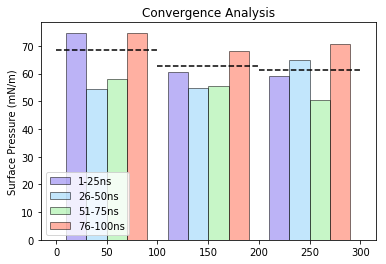

In [50]:
plt.subplot(111)
w = 20
ec='k'
a = 0.5
#print(times[2][-1])
#print(len(times[2]))
A,B,C = getData(1000, times[2]/100, pres[2])
plt.title('Convergence Analysis')
plt.ylabel('Surface Pressure (mN/m)')
plt.bar(A[0], B[0], width=w, color='mediumslateblue', alpha=a, label='1-25ns', edgecolor = ec)
plt.bar(A[1], B[1], width=w, color='lightskyblue', alpha=a, label='26-50ns', edgecolor = ec)
plt.bar(A[2], B[2], width=w, color='lightgreen', alpha=a, label='51-75ns', edgecolor = ec)
plt.bar(A[3], B[3], width=w, color='tomato', alpha=a, label='76-100ns', edgecolor = ec)

D,E,F = getData(1000, times[3]/100, pres[3])
plt.bar(D[0]+100, E[0], width=w, color='mediumslateblue', alpha=a,  edgecolor = ec)
plt.bar(D[1]+100, E[1], width=w, color='lightskyblue', alpha=a,  edgecolor = ec)
plt.bar(D[2]+100, E[2], width=w, color='lightgreen', alpha=a,  edgecolor = ec)
plt.bar(D[3]+100, E[3], width=w, color='tomato', alpha=a, edgecolor = ec)

G,H,I = getData(1000, times[6]/100, pres[6])
plt.bar(G[0]+200, H[0], width=w, color='mediumslateblue', alpha=a,  edgecolor = ec)
plt.bar(G[1]+200, H[1], width=w, color='lightskyblue', alpha=a,  edgecolor = ec)
plt.bar(G[2]+200, H[2], width=w, color='lightgreen', alpha=a,  edgecolor = ec)
plt.bar(G[3]+200, H[3], width=w, color='tomato', alpha=a, edgecolor = ec)

plt.plot([0, 100], [np.mean(pres[2]), np.mean(pres[2])], color='k', ls='dashed')
plt.plot([100, 200], [np.mean(pres[3]), np.mean(pres[3])], color='k', ls='dashed')
plt.plot([200, 300], [np.mean(pres[6]), np.mean(pres[6])], color='k', ls='dashed')
plt.legend(loc=3)
plt.show()